In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import time
from datetime import date, timedelta

news_dates = []
start_date = date(2019, 5, 29)
end_date = date(2019, 7, 28)
delta = timedelta(days=1)

while start_date <= end_date:
  newsdate = start_date.strftime("%Y-%m-%d")
  news_dates.append(newsdate)
  start_date += delta
  


In [0]:
import pandas as pd

path = r'/content/drive/My Drive/g20_uplevel/jackie_json/'
json_end = r'.json'

master_df = pd.read_json(str(path + str(news_dates[0]) + json_end))

for i in range(len(news_dates[1:]) + 1):
  new_path = str(path + str(news_dates[i]) + json_end)
  new_df = pd.read_json(new_path)
  master_df = master_df.append(new_df)
  
len(master_df)

5671

In [0]:
path2 = r'/content/drive/My Drive/g20_uplevel/alton_json/'
json_end = r'.json'

master_df2 = pd.read_json(str(path2 + str(news_dates[0]) + json_end))

for i in range(len(news_dates[1:]) + 1):
  try:
    new_path = str(path2 + str(news_dates[i]) + json_end)
    new_df2 = pd.read_json(new_path)
    master_df2 = master_df2.append(new_df2)
  except:
    pass
  
len(master_df2)

4524

In [0]:
path3 = r'/content/drive/My Drive/g20_uplevel/eddie_json/'
json_end = r'eddie.json'

master_df3 = pd.read_json(str(path3 + str(news_dates[0]) + json_end))

for i in range(len(news_dates[1:]) + 1):
  try:
    new_path = str(path3 + str(news_dates[i]) + json_end)
    new_df3 = pd.read_json(new_path)
    master_df3 = master_df3.append(new_df3)
  except:
    pass
  
len(master_df3)

4136

In [0]:
path4 = r'/content/drive/My Drive/g20_uplevel/eddie_json/japan_summit/'
json_end = r'japan_summit.json'

master_df4 = pd.read_json(str(path4 + str(news_dates[0]) + json_end))

for i in range(len(news_dates[1:]) + 1):
  try:
    new_path = str(path4 + str(news_dates[i]) + json_end)
    new_df4 = pd.read_json(new_path)
    master_df4 = master_df4.append(new_df4)
  except:
    pass
  
len(master_df4)

6008

In [0]:
merged_master = pd.concat([master_df, master_df2, master_df3, master_df4])

len(merged_master)

20339

In [0]:
merged_master_unique = merged_master.drop_duplicates(subset=['title', 'structuredText', 'text'])

In [0]:
len(merged_master_unique)

5545

In [0]:
merged_master_unique.head()

discoverDate  ...                                            website
0  2019-05-29T14:52:19.083+0000  ...  {'name': 'Business Review Weekly', 'hostName':...
1  2019-05-29T02:12:44.595+0000  ...  {'name': 'thebitcoinnews.com/', 'hostName': 't...
2  2019-05-30T20:29:55.561+0000  ...  {'name': 'Pakistan Observer - Newspaper online...
3  2019-05-30T07:17:26.725+0000  ...  {'name': 'Richard Peirce', 'hostName': 'www.me...
4  2019-05-30T06:00:56.986+0000  ...                                                NaN

[5 rows x 13 columns]

In [0]:
import nltk
import numpy as np
import string
import wordcloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import random
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('popular')
nltk.download('vader_lexicon')

#the vader sentiment is the framework to label the sentiments in the article
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

# test code - to test the sentiment analysis for 1 article
passage1 = merged_master_unique.iloc[1]['text']
#def sentiment_scores(passage):
  #score = sia.polarity_scores(passage)
  #print (score)

#sentiment_scores(passage1)

#building an empty list to put in all the scores
#positive scores
pos = []
#negative scores
neg = []
#neutral scores
neu = []
#compound scores - the only one we really care about
com = []

for i in range(len(merged_master_unique['text'])):
  score = sia.polarity_scores(merged_master_unique.iloc[i]['text'])
  pos.append(score['pos'])
  neg.append(score['neg'])
  neu.append(score['neu'])
  com.append(score['compound'])

#just making sure that the com has the right number of items
len(com)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


5545

In [0]:
#testing the dataframe method
merged_master_unique.iloc[0]['discoverDate']

'2019-05-29T14:52:19.083+0000'

In [0]:
#testing the string method
string1 = '2019-05-29T14:52:19.083+0000'
string1 = (string1)[:10]

#checking the modified string
string1

'2019-05-29'

In [0]:
##creating a new list of actual dates
new_dates = []

#creating a list of new dates with the first 10 characters - the actual calendar date - iterating through all the discoverDate
for i in range(len(merged_master_unique['discoverDate'])):
  date = (merged_master_unique.iloc[i]['discoverDate'])[:10]
  new_dates.append(date)

#checking that all the dates are done
len (new_dates)



5545

In [0]:
#setting the new dates as datetime objects
from datetime import datetime
[datetime.strptime(x, '%Y-%m-%d') for x in new_dates]

#checking that nothing has changed
len(new_dates)

5545

In [0]:
#adding dates to a new column in the dataframe
merged_master_unique['actual_dates'] = new_dates

#checking the modifed dataframe
merged_master_unique.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


discoverDate  ... actual_dates
0  2019-05-29T14:52:19.083+0000  ...   2019-05-29
1  2019-05-29T02:12:44.595+0000  ...   2019-05-29
2  2019-05-30T20:29:55.561+0000  ...   2019-05-30
3  2019-05-30T07:17:26.725+0000  ...   2019-05-30
4  2019-05-30T06:00:56.986+0000  ...   2019-05-30

[5 rows x 14 columns]

In [0]:
#adding the sentiment compound score into the dataframe
merged_master_unique['compound_score'] = com

#renaming the dataframe
sentiment_df=merged_master_unique

#checking the dataframe
sentiment_df.head()

from google.colab import files



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:

#this calculates the mean(average) compound score by date
sentiment_df.groupby('actual_dates').mean()[['compound_score']]

# just relabelling the dataframe
plot_df = sentiment_df.groupby('actual_dates').mean()[['compound_score']]

#just checking what's in the new dataframe
plot_df['compound_score']

actual_dates
2019-05-29    0.115922
2019-05-30    0.117629
2019-05-31    0.097990
2019-06-01   -0.306395
2019-06-02    0.046898
2019-06-03   -0.027267
2019-06-04    0.128856
2019-06-05    0.208262
2019-06-06   -0.100216
2019-06-07    0.177865
2019-06-08    0.697788
2019-06-09    0.549641
2019-06-10    0.165761
2019-06-11    0.408956
2019-06-12    0.148493
2019-06-13    0.027677
2019-06-14    0.225828
2019-06-15    0.008792
2019-06-16    0.141968
2019-06-17    0.004655
2019-06-18    0.267192
2019-06-19    0.488837
2019-06-20    0.158809
2019-06-21    0.252580
2019-06-22    0.428469
2019-06-23    0.422773
2019-06-24    0.202534
2019-06-25    0.348919
2019-06-26   -0.022037
2019-06-27    0.139878
                ...   
2019-06-30    0.480571
2019-07-01    0.255858
2019-07-02    0.220004
2019-07-03    0.060991
2019-07-04    0.464340
2019-07-05    0.360715
2019-07-06    0.352262
2019-07-07    0.504991
2019-07-08    0.412834
2019-07-09    0.254282
2019-07-10    0.165600
2019-07-11    0.37526

In [0]:
#resetting and relabelling the dataframe to prepare for plotting. reset_index makes sure that actual_dates and compound_score are now two distinct columns
df1 = plot_df.groupby('actual_dates').sum().reset_index()

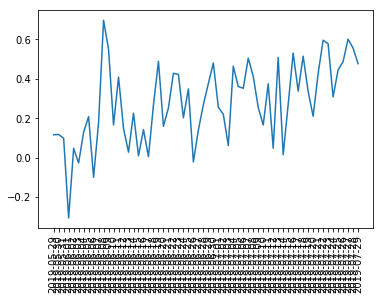

In [0]:
#plotting actual_dates (x-axis) by compound_score (y-axis) 
import matplotlib.pyplot as plt 

plt.xticks(rotation=90)
plt.plot(df1['actual_dates'], df1['compound_score'])

In [0]:
countryname = []
hostname = []
name = []
domainname = []

for i in range(len(sentiment_df)):
  placeholder = sentiment_df.iloc[i]['website']
  if type(placeholder) == dict:
    countryname.append(placeholder['countryName'])
    hostname.append(placeholder['hostName'])
    name.append(placeholder['name'])
    domainname.append(placeholder['domainName'])
  else:
    countryname.append(None)
    hostname.append(None)
    name.append(None)
    domainname.append(None)
    
#make new columns in sentiment_df dataframe
sentiment_df['countryName'] = countryname
sentiment_df['hostName'] = hostname
sentiment_df['name'] = name
sentiment_df['domainName'] = domainname

sentiment_df.head()


    
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

discoverDate  ...          domainName
0  2019-05-29T14:52:19.083+0000  ...             afr.com
1  2019-05-29T02:12:44.595+0000  ...  thebitcoinnews.com
2  2019-05-30T20:29:55.561+0000  ...     pakobserver.net
3  2019-05-30T07:17:26.725+0000  ...            metro.us
4  2019-05-30T06:00:56.986+0000  ...                None

[5 rows x 19 columns]

In [0]:
#just relabelling the dataframe
country_df = sentiment_df.groupby('countryName').mean()[['compound_score']]

country_df1 = country_df.groupby('countryName').sum().reset_index()

country_df1

countryName  compound_score
0                               0.298644
1              Australia        0.232715
2             Bangladesh        0.022900
3                Belarus        0.721022
4                Belgium        0.986900
5               Bulgaria        0.572067
6                 Canada        0.076436
7                  China        0.537217
8                 Cyprus        0.191025
9                Denmark        0.277333
10                France        0.981588
11               Germany        0.764700
12                 Ghana        0.985750
13                Greece        0.611067
14             Hong Kong        0.444960
15                 India        0.439878
16             Indonesia        0.995600
17                  Iran        0.991300
18               Ireland       -0.067974
19                Israel       -0.620114
20                 Italy        0.343423
21                 Japan        0.469725
22                Jordan        0.460900
23                 Kenya        0.318200
24              Malaysia        0.986700
25                 Malta       -0.734200
26                 Nepal        0.381800
27           New Zealand        0.993400
28               Nigeria        0.206072
29              Pakistan        0.143108
30           Philippines        0.478264
31                 Qatar        0.989200
32                Russia        0.495150
33             Singapore        0.056594
34              Slovenia        0.972600
35          South Africa        0.998050
36           South Korea       -0.886000
37           Switzerland        0.186755
38                Taiwan        0.081881
39              Thailand        0.041725
40  United Arab Emirates        0.120254
41        United Kingdom        0.298538
42         United States        0.239977
43               Uruguay        0.056250

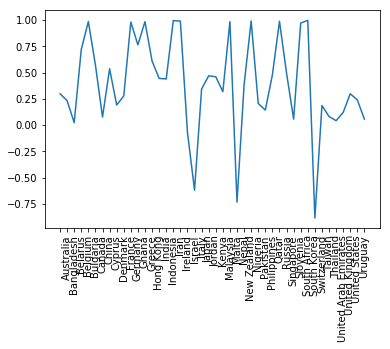

In [0]:
import matplotlib.pyplot as plt 

plt.xticks(rotation=90)
plt.plot(country_df1['countryName'], country_df1['compound_score'])

In [0]:
sentiment_df.head()

discoverDate  ...          domainName
0  2019-05-29T14:52:19.083+0000  ...             afr.com
1  2019-05-29T02:12:44.595+0000  ...  thebitcoinnews.com
2  2019-05-30T20:29:55.561+0000  ...     pakobserver.net
3  2019-05-30T07:17:26.725+0000  ...            metro.us
4  2019-05-30T06:00:56.986+0000  ...                None

[5 rows x 19 columns]

In [0]:


news_dates

#defining the dates week by week
week_1 = news_dates[0:7]
week_2 = news_dates[7:14]
week_3 = news_dates[14:21]
week_4 = news_dates[21:28]
week_5 = news_dates[28:35]
week_6 = news_dates[35:42]
week_7 = news_dates[42:49]
week_8 = news_dates[49:56]
week_9 = ['2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29']

#checking what's in the various lists
print (week_1)
print (week_2)
print (week_3)
print (week_4)
print (week_5)
print (week_6)
print (week_7)
print (week_8)
print (week_9)

['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04']
['2019-06-05', '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11']
['2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18']
['2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25']
['2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30', '2019-07-01', '2019-07-02']
['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09']
['2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16']
['2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23']
['2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29']


In [0]:
dates = sentiment_df['actual_dates']

len(dates)


5545

In [0]:
#going through the dates in actual_dates in the df

weeks = []

for date in dates:
  for i in week_1:
    if date == i:
      weeks.append(1)
    else:
      pass

len(weeks)




517

In [0]:
weeks_2 = []

for date in dates:
  for i in week_2:
    if date == i:
      weeks_2.append(2)
    else:
      pass

len (weeks_2)

631

In [0]:
weeks_3 = []

for date in dates:
  for i in week_3:
    if date == i:
      weeks_3.append(3)
    else:
      pass

len (weeks_3)

605

In [0]:
weeks_4 = []

for date in dates:
  for i in week_4:
    if date == i:
      weeks_4.append(4)
    else:
      pass

len (weeks_4)



672

In [0]:
weeks_5 = []

for date in dates:
  for i in week_5:
    if date == i:
      weeks_5.append(5)
    else:
      pass

len (weeks_5)



788

In [0]:
weeks_6 = []

for date in dates:
  for i in week_6:
    if date == i:
      weeks_6.append(6)
    else:
      pass

len (weeks_6)



585

In [0]:
weeks_7 = []

for date in dates:
  for i in week_7:
    if date == i:
      weeks_7.append(7)
    else:
      pass

len (weeks_7)


616

In [0]:
weeks_8 = []

for date in dates:
  for i in week_8:
    if date == i:
      weeks_8.append(8)
    else:
      pass

len (weeks_8)



641

In [0]:
weeks_9 = []

for date in dates:
  for i in week_9:
    if date == i:
      weeks_9.append(9)
    else:
      pass

len (weeks_9)

490

In [0]:

#checking that the total number of values is correct
actual_week = weeks + weeks_2 + weeks_3 + weeks_4 + weeks_5 + weeks_6 + weeks_7 + weeks_8 + weeks_9

len(actual_week)

5545

In [0]:
#checking that the weeks had been attached to the maind dataframe
sentiment_df['actual_week'] = actual_week

sentiment_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


discoverDate  ... actual_week
0  2019-05-29T14:52:19.083+0000  ...           1
1  2019-05-29T02:12:44.595+0000  ...           1
2  2019-05-30T20:29:55.561+0000  ...           1
3  2019-05-30T07:17:26.725+0000  ...           1
4  2019-05-30T06:00:56.986+0000  ...           1

[5 rows x 20 columns]

In [0]:

#generate weekly average sentiment score
weeks_score_df = sentiment_df.groupby('actual_week').mean()[['compound_score']]

week_score = weeks_score_df['compound_score']

week_score

actual_week
1    0.125433
2    0.205268
3    0.214619
4    0.216383
5    0.254744
6    0.144798
7    0.352770
8    0.454552
9    0.587801
Name: compound_score, dtype: float64

In [0]:
#making sure that there are 9 long texts - one for each week
weekly_text_list = []

for d in sentiment_df.groupby(['actual_week'])['text']:
  weekly_df = ' '.join(d[1])
  weekly_text_list.append(weekly_df)

len (weekly_text_list)

9

In [0]:
#running the topic model code



from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')

def split_text_into_paras(text):
  sentences_per_para = 10
  sentences_list = nltk.tokenize.sent_tokenize(text)
  para_list = []
  new_para = ''
  sent_count_per_para = 0
  
  for sentence in sentences_list:
    if (sent_count_per_para < sentences_per_para):
      new_para+=sentence
      sent_count_per_para+=1
    elif(sent_count_per_para==sentences_per_para):
      para_list.append(new_para)
      new_para = ''
      sent_count_per_para = 0
  para_list.append(new_para)
  return para_list




def display_topics(model, feature_names, no_top_word):
  top_20_topics = []
  word_list = []
  for topic_idx, topic in enumerate(model.components_):
    word_list.append(([feature_names[i] for i in topic.argsort()[:-no_top_word - 1:-1]]))
  return (word_list)
    
#declaring stopwords variable, and then adding more stopwords into the existing list
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['said', 'g20', 'summit', 'also', '20', 'G20', 'Summit', 'per', 'cent'])


#generating the topics for all the 9 weeks - long list of 90 topics 

all_list = []
for i in range(len(weekly_text_list)):
  words = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stopwords)
  bag_of_words = words.fit_transform(split_text_into_paras(weekly_text_list[i]))
  word_names = words.get_feature_names()
  lda = LDA(n_components = 10).fit(bag_of_words)
  all_list.append(([i] + display_topics(lda, word_names, 5)))

len (all_list)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


9

In [0]:
for i in range(len(weekly_text_list)):
  words = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words=stopwords)
  bag_of_words = words.fit_transform(split_text_into_paras(weekly_text_list[i]))
  word_names = words.get_feature_names()
  lda = LDA(n_components = 10).fit(bag_of_words)
  print (display_topics(lda, word_names, 5))

#should really think about how to make this less manual - how to declare every iterate output as a variable

[['trade', 'chinese', 'china', 'countries', 'two'], ['climate', 'change', 'government', 'companies', 'would'], ['trade', 'global', 'growth', 'dollar', 'currency'], ['tax', 'financial', 'countries', 'finance', 'global'], ['meeting', 'trade', 'finance', 'japan', 'china'], ['china', 'us', 'trade', 'chinese', 'tariffs'], ['japan', 'mexico', 'trump', 'minister', 'president'], ['trade', 'oil', 'year', 'fell', 'markets'], ['trade', 'india', 'countries', 'us', 'global'], ['trump', 'president', 'one', 'people', 'would']]
[['trade', 'global', 'meeting', 'growth', 'finance'], ['us', 'mr', 'hydrogen', 'china', 'japan'], ['iran', 'us', 'japan', 'oil', 'trump'], ['financial', 'countries', 'crypto', 'digital', 'data'], ['cut', 'trade', 'rate', 'fed', 'week'], ['china', 'president', 'hong', 'kong', 'would'], ['energy', 'plastic', 'countries', 'japan', 'environment'], ['canada', 'china', 'trudeau', 'minister', 'prime'], ['tariffs', 'trade', 'china', 'billion', 'us'], ['trump', 'china', 'trade', 'chines

In [0]:
week_1=[['china', 'trade', 'chinese', 'us', 'trump'], ['india', 'us', 'trade', 'turkey', 'data'], ['trade', 'finance', 'meeting', 'global', 'japan'], ['tax', 'countries', 'digital', 'finance', 'companies'], ['japan', 'trade', 'crypto', 'year', 'yields'], ['climate', 'change', 'global', 'energy', 'new'], ['trade', 'oil', 'crude', 'barrel', 'thursday'], ['year', 'trade', 'percent', 'global', 'growth'], ['trump', 'president', 'minister', 'mr', 'one'], ['financial', 'market', 'china', 'canada', 'economic']]
week_2=[['market', 'fed', 'data', 'rate', 'meeting'], ['global', 'trade', 'financial', 'countries', 'japan'], ['trump', 'china', 'trade', 'tariffs', 'chinese'], ['energy', 'plastic', 'putin', 'russia', 'japan'], ['china', 'trump', 'trade', 'chinese', 'two'], ['year', 'new', 'tax', 'companies', 'india'], ['trade', 'growth', 'meeting', 'global', 'china'], ['iran', 'oil', 'energy', 'attacks', 'united'], ['hong', 'kong', 'pompeo', 'would', 'china'], ['trade', 'week', 'markets', 'cut', 'index']]
week_3=[['hong', 'kong', 'china', 'bill', 'xi'], ['market', 'week', 'us', 'investors', 'trade'], ['president', 'minister', 'india', 'prime', 'leaders'], ['xi', 'trade', 'economy', 'global', 'development'], ['trump', 'president', 'trudeau', 'canada', 'ivanka'], ['china', 'trade', 'trump', 'us', 'chinese'], ['research', 'crypto', 'fatf', 'financial', 'information'], ['north', 'kim', 'trump', 'korea', 'xi'], ['global', 'japan', 'countries', 'world', 'international'], ['week', 'dollar', 'us', 'iran', 'japan']]
week_4=[['huawei', 'us', 'companies', 'company', 'trump'], ['turkey', 'russia', 'sanctions', 'erdogan', 'trump'], ['china', 'us', 'trade', 'growth', 'global'], ['data', 'trade', 'index', 'cut', 'june'], ['climate', '2019', 'global', 'energy', 'change'], ['chinese', 'us', 'china', 'year', 'financial'], ['trade', 'us', 'india', 'tariffs', 'china'], ['china', 'trump', 'canada', 'chinese', 'xi'], ['trump', 'president', 'world', 'ivanka', 'one'], ['saudi', 'merkel', 'arabia', 'minister', 'shaking']]
week_5=[['china', 'trade', 'chinese', 'trump', 'tariffs'], ['week', 'trade', 'fed', 'last', 'index'], ['japan', 'india', 'minister', 'world', 'global'], ['percent', 'growth', 'global', 'energy', 'us'], ['year', '2019', 'million', 'company', '2018'], ['president', 'trump', 'russia', 'told', 'would'], ['china', 'canada', 'united', 'states', 'president'], ['us', 'trump', 'huawei', 'india', 'pakistan'], ['government', 'hong', 'kong', 'people', 'bill'], ['trade', 'countries', 'wto', 'world', 'system']]
week_6=[['trump', 'mueller', 'report', 'charges', 'thursday'], ['market', 'share', '2019', 'investment', 'june'], ['global', 'world', 'japan', 'climate', 'international'], ['plastic', 'iran', 'japan', 'deal', 'would'], ['north', 'korea', 'trump', 'japan', 'us'], ['north', 'canada', 'canadian', 'trudeau', 'trump'], ['people', 'one', 'china', 'like', 'us'], ['china', 'trade', 'chinese', 'trump', 'huawei'], ['trade', 'us', 'xi', 'trump', 'two'], ['trump', 'president', 'merkel', 'minister', 'prime']]
week_7=[['china', 'trade', 'asean', 'us', 'market'], ['china', 'hong', 'kong', 'would', 'united'], ['week', 'bloomberg', 'stocks', 'trade', 'market'], ['trump', 'president', 'meeting', 'japan', 'putin'], ['trump', 'us', 'japan', 'president', 'would'], ['india', 'trade', 'new', 'year', 'us'], ['trade', 'trump', 'chinese', 'tariffs', 'china'], ['japan', 'plastic', 'abe', 'iran', 'japanese'], ['trump', 'president', 'japan', 'press', 'south'], ['north', 'korea', 'kim', 'xi', 'trump']]
week_8=[['2019', 'business', 'company', '30', 'technology'], ['china', 'trade', 'trump', 'chinese', 'us'], ['telescope', 'construction', 'hawaii', 'mauna', 'kea'], ['north', 'korea', 'kim', 'trump', 'nuclear'], ['trump', 'economy', 'growth', 'rates', 'president'], ['trump', 'president', 'european', 'eu', 'iran'], ['south', 'korea', 'remains', 'trump', 'japan'], ['trump', 'va', 'veterans', 'care', 'years'], ['us', 'one', 'year', 'would', 'people'], ['world', 'new', 'voice', 'first', 'government']]
week_9=[['rating', 'company', 'research', 'average', 'stock'], ['mountain', 'telescope', 'time', 'hawaii', 'one'], ['new', 'climate', 'government', 'people', 'need'], ['open', '2020', 'event', 'wwrs', 'worldwide'], ['shares', 'quarter', 'stock', '000', 'company'], ['south', 'japan', 'japanese', 'work', 'medical'], ['asean', 'africa', 'president', 'women', 'event'], ['digital', 'business', '2019', 'technology', 'marketing'], ['trump', 'north', 'korea', 'china', 'trade'], ['company', 'products', 'time', 'work', 'niagara']]

In [0]:
#create columns, topic by topic - should figure out how to do this less manually
topic_1 = [week_1[0], week_2[0], week_3[0], week_4[0], week_5[0], week_6[0], week_7[0], week_8[0], week_9[0]]
topic_2 = [week_1[1], week_2[1], week_3[1], week_4[1], week_5[1], week_6[1], week_7[1], week_8[1], week_9[1]]
topic_3= [week_1[2], week_2[2], week_3[2], week_4[2], week_5[2], week_6[2], week_7[2], week_8[2], week_9[2]]
topic_4= [week_1[3], week_2[3], week_3[3], week_4[3], week_5[3], week_6[3], week_7[3], week_8[3], week_9[3]]
topic_5= [week_1[4], week_2[4], week_3[4], week_4[4], week_5[4], week_6[4], week_7[4], week_8[4], week_9[4]]
topic_6= [week_1[5], week_2[5], week_3[5], week_4[5], week_5[5], week_6[5], week_7[5], week_8[5], week_9[5]]
topic_7= [week_1[6], week_2[6], week_3[6], week_4[6], week_5[6], week_6[6], week_7[6], week_8[6], week_9[6]]
topic_8= [week_1[7], week_2[7], week_3[7], week_4[7], week_5[7], week_6[7], week_7[7], week_8[7], week_9[7]]
topic_9= [week_1[8], week_2[8], week_3[8], week_4[8], week_5[8], week_6[8], week_7[8], week_8[8], week_9[8]]
topic_10= [week_1[9], week_2[9], week_3[9], week_4[9], week_5[9], week_6[9], week_7[9], week_8[9], week_9[9]]

In [0]:
import pandas as pd

#declare first column of weeks
week = ['week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9']

topic_df = pd.DataFrame()
topic_df['week'] = week
topic_df['topic 1'] = topic_1
topic_df['topic 2'] = topic_2
topic_df['topic 3'] = topic_3
topic_df['topic 4'] = topic_4
topic_df['topic 5'] = topic_5
topic_df['topic 6'] = topic_6
topic_df['topic 7'] = topic_7
topic_df['topic 8'] = topic_8
topic_df['topic 9'] = topic_9
topic_df['topic 10'] = topic_10

topic_df

week  ...                                      topic 10
0  week_1  ...  [financial, market, china, canada, economic]
1  week_2  ...            [trade, week, markets, cut, index]
2  week_3  ...               [week, dollar, us, iran, japan]
3  week_4  ...    [saudi, merkel, arabia, minister, shaking]
4  week_5  ...        [trade, countries, wto, world, system]
5  week_6  ...   [trump, president, merkel, minister, prime]
6  week_7  ...                [north, korea, kim, xi, trump]
7  week_8  ...        [world, new, voice, first, government]
8  week_9  ...      [company, products, time, work, niagara]

[9 rows x 11 columns]

In [0]:
#add additional sentiment score to the end of the dataframe

topic_df['Sentiment_score'] =  [0.125433, 0.205268, 0.214619, 0.216383, 0.254744, 0.144798, 0.352770, 0.454552, 0.587801]

topic_df

week  ... Sentiment_score
0  week_1  ...        0.125433
1  week_2  ...        0.205268
2  week_3  ...        0.214619
3  week_4  ...        0.216383
4  week_5  ...        0.254744
5  week_6  ...        0.144798
6  week_7  ...        0.352770
7  week_8  ...        0.454552
8  week_9  ...        0.587801

[9 rows x 12 columns]

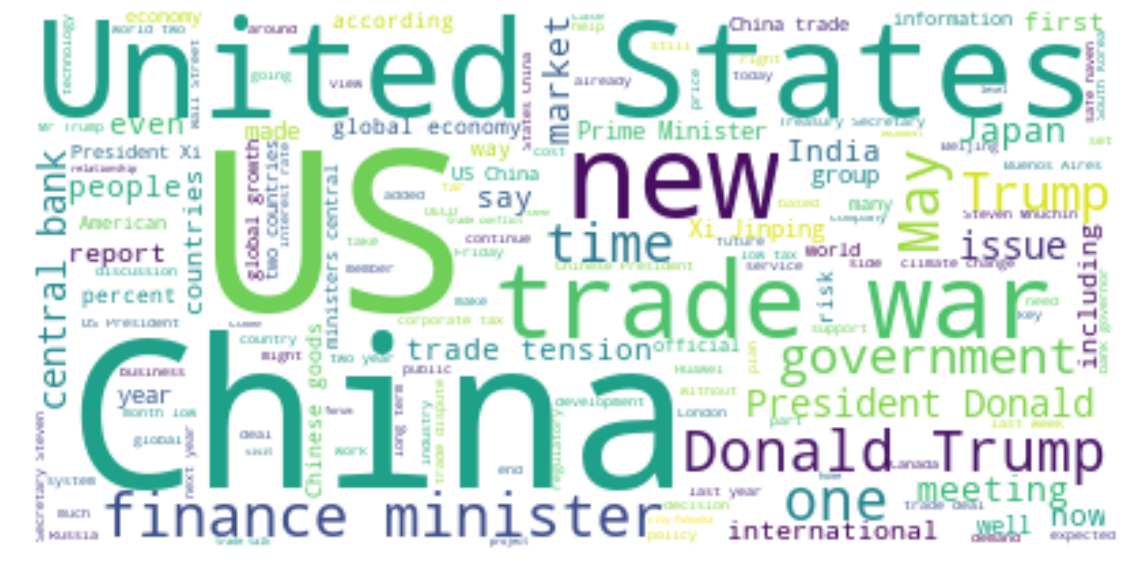

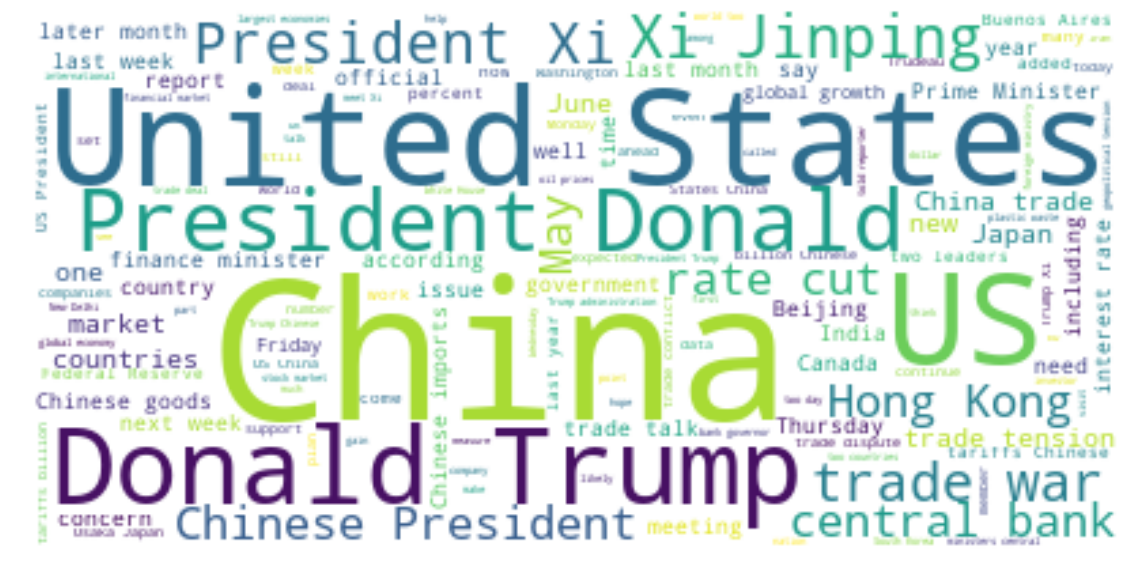

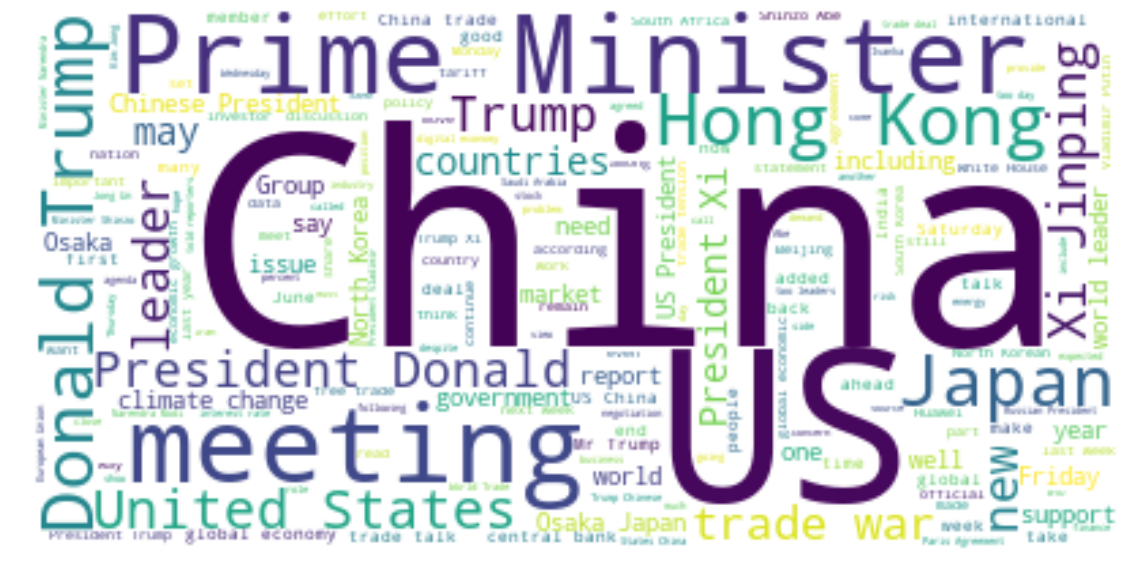

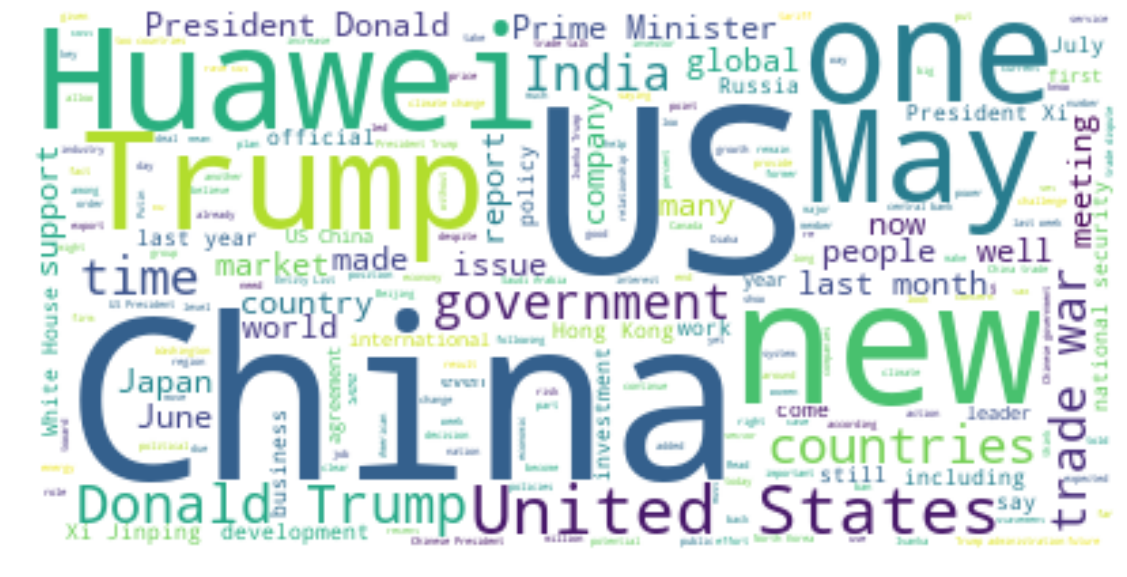

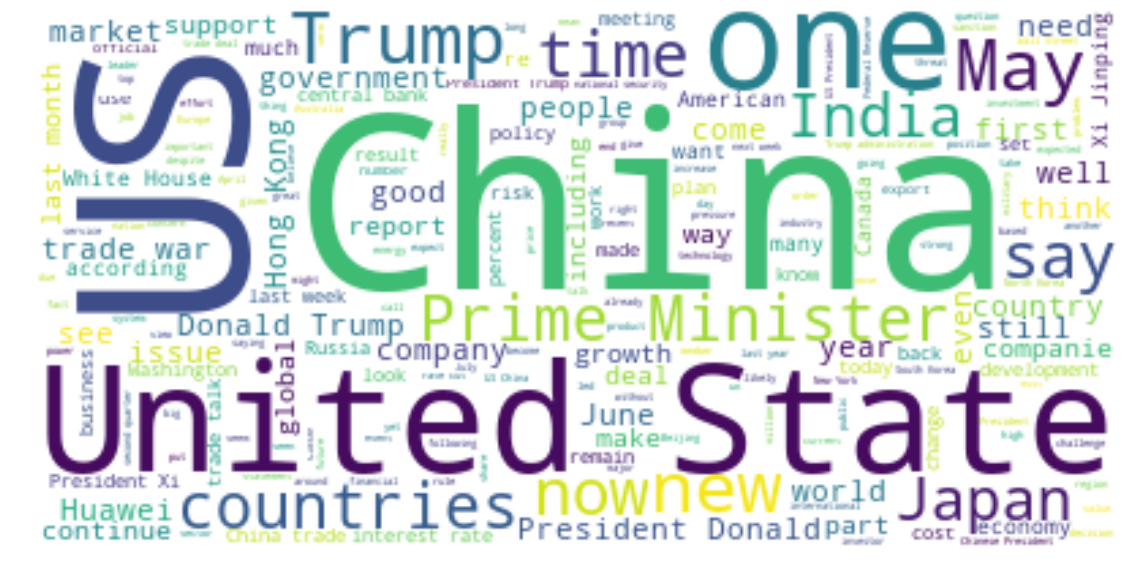

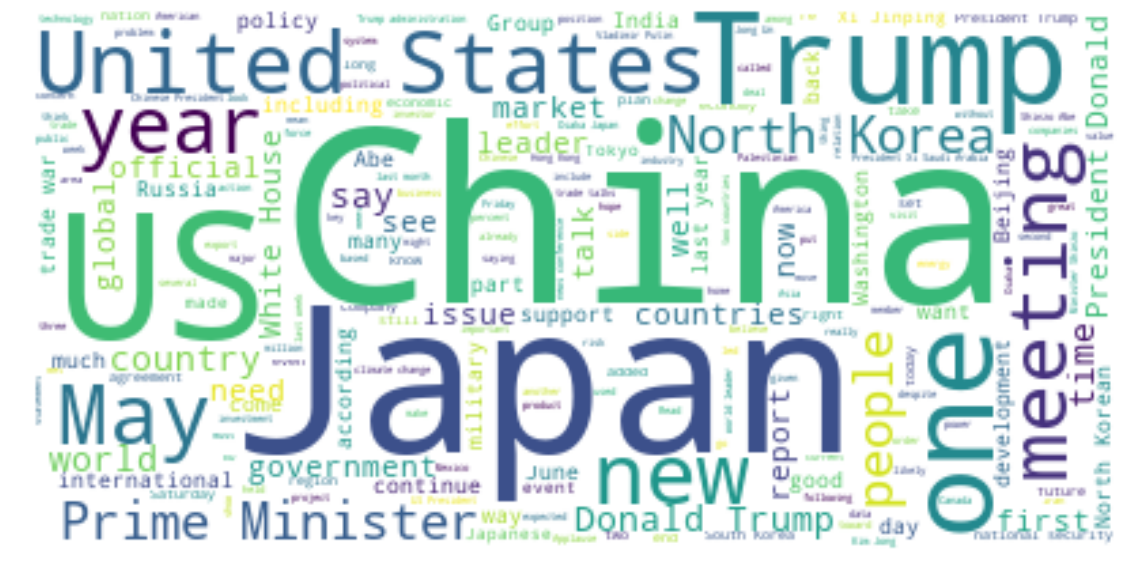

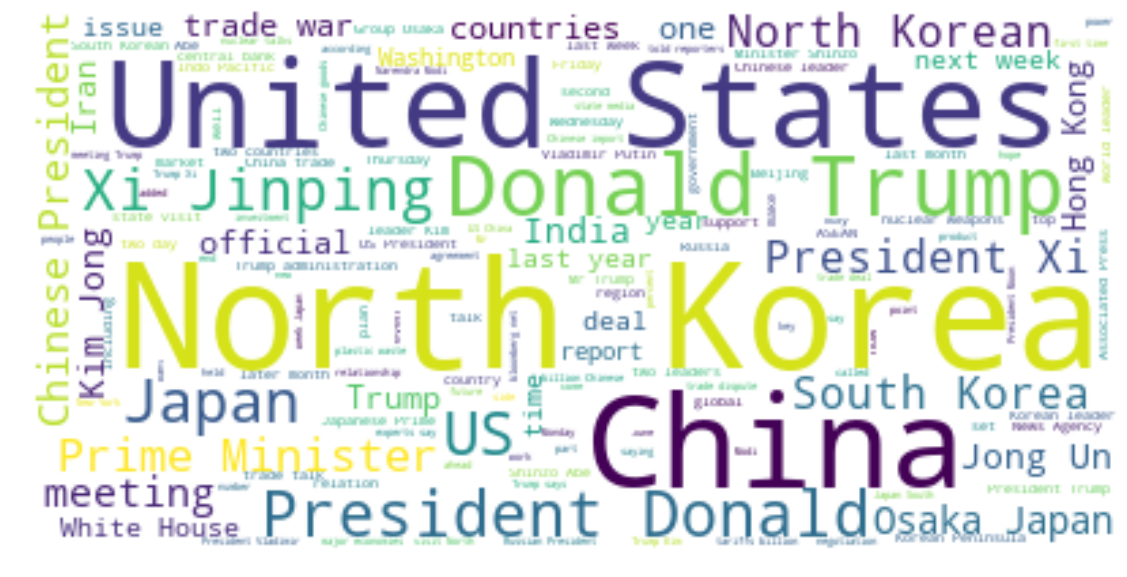

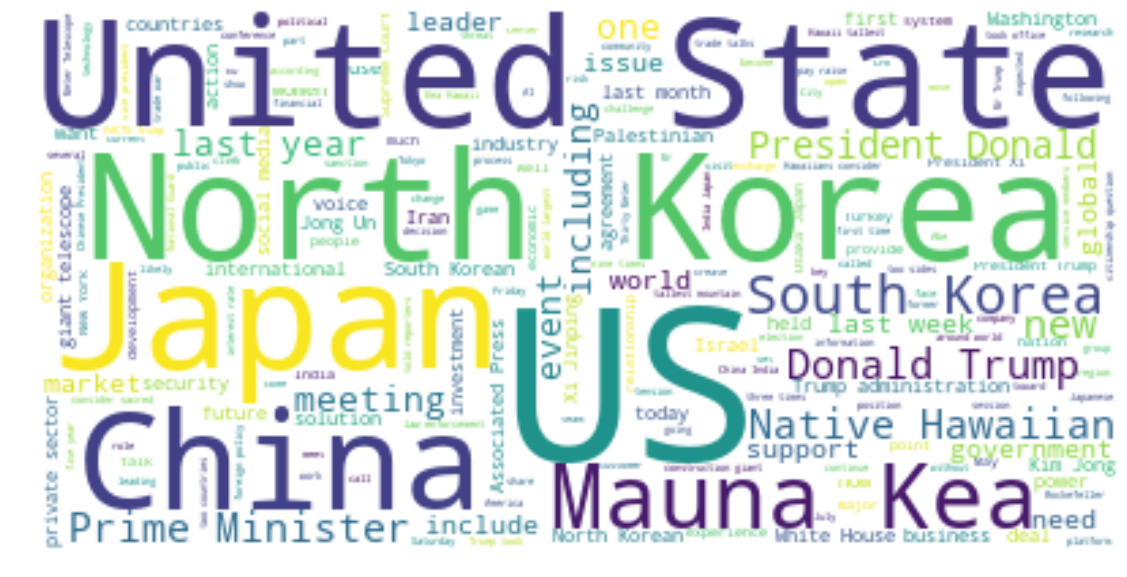

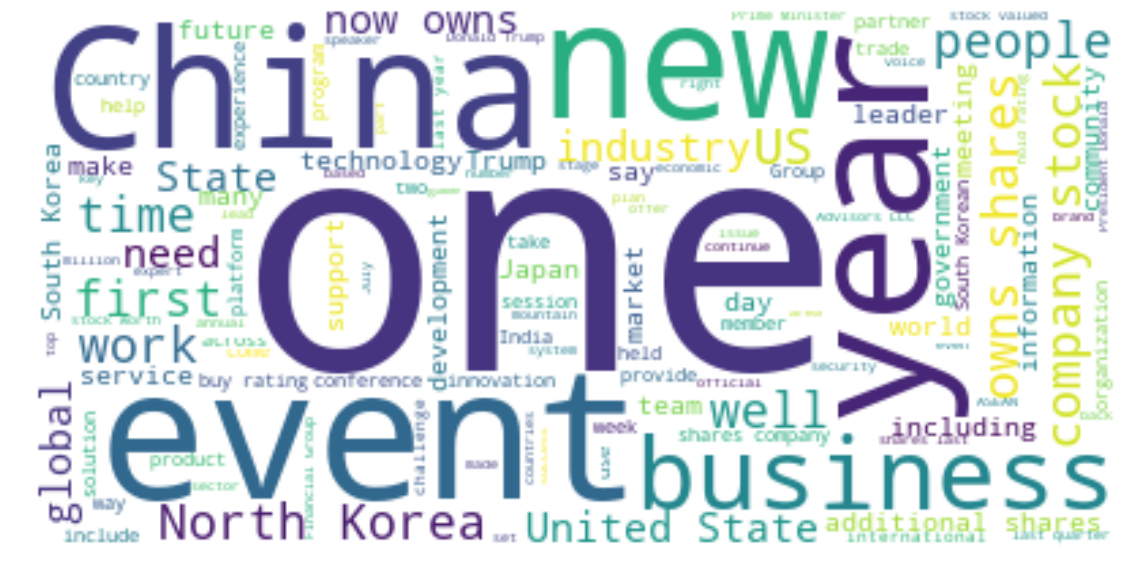

In [0]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['said', 'g20', 'summit', 'also', '20', 'G20', 'Summit', 'per', 'cent', 'will'])

for i in range(len(weekly_text_list)):
  wordcloud_ = WordCloud(stopwords=stopwords, background_color ='white').generate(weekly_text_list[i])
  plt.figure(figsize=(20, 10))
  plt.imshow(wordcloud_, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  


In [0]:
sources = []
for i in sentiment_df['url']:
  if i is not None:
    try:
      split_url = i.split(".")
      source= split_url[1]
      sources.append(source)
    except:
      sources.append(None)
  else:
    sources.append(None)
    
sentiment_df['sources'] = sources

sentiment_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


discoverDate  ...                                            sources
0  2019-05-29T14:52:19.083+0000  ...                                                afr
1  2019-05-29T02:12:44.595+0000  ...  com/g20-countries-start-implementing-unified-c...
2  2019-05-30T20:29:55.561+0000  ...  net/g20-countries-eye-tax-policy-for-internet-...
3  2019-05-30T07:17:26.725+0000  ...                                              metro
4  2019-05-30T06:00:56.986+0000  ...                                     marketscreener

[5 rows x 21 columns]

In [0]:
sentiment_df['sources'].value_counts()

marketscreener                                                                                          550
channelnewsasia                                                                                         220
financialexpress                                                                                        138
japantimes                                                                                              131
businessinsider                                                                                         106
reuters                                                                                                 101
socialnews                                                                                               97
express                                                                                                  80
swissinfo                                                                                                80
washingtontimes             

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE Australia, else rejected
is_australia =  sentiment_df['countryName']=='Australia'

#applies the filter to the dataframe
sentiment_australia = sentiment_df[is_australia]

len(sentiment_australia)

199

In [0]:
aus_wks_score = sentiment_australia.groupby('actual_week').mean()['compound_score']
                                                                     
country_wks_score = pd.DataFrame()

country_wks_scoreweek = ['week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9']

country_wks_score['Australia'] = aus_wks_score

country_wks_score


Australia
actual_week           
1             0.140997
2             0.178189
3             0.180589
4             0.326513
5             0.392493
6             0.149188
7             0.253435
8             0.197600
9             0.631550

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE America, else rejected
is_america_US =  sentiment_df['countryName']=='United States'

#applies the filter to the dataframe
sentiment_america = sentiment_df[is_america_US]

sentiment_america.head()

len(sentiment_america)

13

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE Australia, else rejected
is_china =  sentiment_df['countryName']=='China'

#applies the filter to the dataframe
sentiment_china = sentiment_df[is_china]

sentiment_china.head()

len(sentiment_china)

12

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE Australia, else rejected
is_japan =  sentiment_df['countryName']=='Japan'

#applies the filter to the dataframe
sentiment_japan = sentiment_df[is_japan]

sentiment_japan.head()

len (sentiment_japan)

jpn_wks_score = sentiment_japan.groupby('actual_week').mean()['compound_score']

country_wks_score['Japan'] = jpn_wks_score

country_wks_score

Australia     Japan
actual_week                     
1             0.140997  0.380043
2             0.178189  0.347365
3             0.180589  0.612675
4             0.326513 -0.221530
5             0.392493  0.570487
6             0.149188  0.563125
7             0.253435  0.712648
8             0.197600  0.355765
9             0.631550  0.780275

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE none, else rejected
is_none =  sentiment_df['countryName']==''

#applies the filter to the dataframe
sentiment_none = sentiment_df[is_none]

sentiment_none.head()


discoverDate  ...                                            sources
1   2019-05-29T02:12:44.595+0000  ...  com/g20-countries-start-implementing-unified-c...
3   2019-05-30T07:17:26.725+0000  ...                                              metro
12  2019-05-30T02:08:52.425+0000  ...                                            reuters
20  2019-05-29T20:19:22.989+0000  ...                                           benzinga
21  2019-05-30T06:39:04.407+0000  ...      org/news/2019-05-g20-countries-eye-tax-policy

[5 rows x 21 columns]

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE Australia, else rejected
is_france =  sentiment_df['countryName']=='France'

#applies the filter to the dataframe
sentiment_france = sentiment_df[is_france]

sentiment_france.head()

len (sentiment_france)

8

In [0]:
sentiment_df['countryName'].value_counts()

                        2733
India                    285
Singapore                228
Australia                199
Canada                   197
United Kingdom           185
Japan                    138
Switzerland               93
Taiwan                    63
Philippines               59
Nigeria                   58
Ireland                   43
Pakistan                  39
Italy                     13
United States             13
United Arab Emirates      13
Uruguay                   12
China                     12
Cyprus                    12
Greece                     9
Belarus                    9
France                     8
Germany                    7
Jordan                     7
Israel                     7
Hong Kong                  5
Malaysia                   5
Thailand                   4
Malta                      3
Denmark                    3
Bulgaria                   3
Qatar                      2
South Africa               2
Ghana                      2
Russia        

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE Australia, else rejected
is_canada =  sentiment_df['countryName']=='Canada'

#applies the filter to the dataframe
sentiment_canada = sentiment_df[is_canada]

sentiment_canada.head()

cnd_wks_score = sentiment_canada.groupby('actual_week').mean()['compound_score']

country_wks_score['Canada'] = cnd_wks_score

country_wks_score





Australia     Japan    Canada
actual_week                               
1             0.140997  0.380043 -0.275869
2             0.178189  0.347365 -0.273750
3             0.180589  0.612675  0.218750
4             0.326513 -0.221530 -0.237083
5             0.392493  0.570487 -0.017495
6             0.149188  0.563125 -0.009627
7             0.253435  0.712648  0.299900
8             0.197600  0.355765  0.454926
9             0.631550  0.780275  0.743472

In [0]:
#creating dataframe subsets by country

#this creates a filter - declares that the values in the countryName column MUST BE UK, else rejected
is_uk =  sentiment_df['countryName']=='United Kingdom'

#applies the filter to the dataframe
sentiment_uk = sentiment_df[is_uk]

sentiment_uk.head()

uk_wks_score = sentiment_uk.groupby('actual_week').mean()['compound_score']

country_wks_score['UK'] = uk_wks_score

country_wks_score


Australia     Japan    Canada        UK
actual_week                                         
1             0.140997  0.380043 -0.275869  0.605782
2             0.178189  0.347365 -0.273750  0.087964
3             0.180589  0.612675  0.218750  0.287596
4             0.326513 -0.221530 -0.237083  0.296142
5             0.392493  0.570487 -0.017495  0.277736
6             0.149188  0.563125 -0.009627 -0.048317
7             0.253435  0.712648  0.299900  0.702727
8             0.197600  0.355765  0.454926  0.266293
9             0.631550  0.780275  0.743472  0.261779

In [0]:
is_sgp =  sentiment_df['countryName']=='Singapore'
sentiment_sgp = sentiment_df[is_sgp]

sgp_wks_score = sentiment_sgp.groupby('actual_week').mean()['compound_score']

country_wks_score['Singapore'] = sgp_wks_score

country_wks_score

Australia     Japan    Canada        UK  Singapore
actual_week                                                    
1             0.140997  0.380043 -0.275869  0.605782  -0.005094
2             0.178189  0.347365 -0.273750  0.087964   0.014450
3             0.180589  0.612675  0.218750  0.287596   0.033931
4             0.326513 -0.221530 -0.237083  0.296142   0.067168
5             0.392493  0.570487 -0.017495  0.277736   0.334024
6             0.149188  0.563125 -0.009627 -0.048317  -0.087275
7             0.253435  0.712648  0.299900  0.702727  -0.216567
8             0.197600  0.355765  0.454926  0.266293   0.229033
9             0.631550  0.780275  0.743472  0.261779  -0.400333

In [0]:
is_ind =  sentiment_df['countryName']=='India'
sentiment_ind = sentiment_df[is_ind]

ind_wks_score = sentiment_ind.groupby('actual_week').mean()['compound_score']

country_wks_score['India'] = ind_wks_score

country_wks_score

Australia     Japan    Canada        UK  Singapore     India
actual_week                                                              
1             0.140997  0.380043 -0.275869  0.605782  -0.005094  0.405122
2             0.178189  0.347365 -0.273750  0.087964   0.014450  0.396991
3             0.180589  0.612675  0.218750  0.287596   0.033931  0.164845
4             0.326513 -0.221530 -0.237083  0.296142   0.067168  0.382168
5             0.392493  0.570487 -0.017495  0.277736   0.334024  0.527707
6             0.149188  0.563125 -0.009627 -0.048317  -0.087275  0.451853
7             0.253435  0.712648  0.299900  0.702727  -0.216567  0.544239
8             0.197600  0.355765  0.454926  0.266293   0.229033  0.744568
9             0.631550  0.780275  0.743472  0.261779  -0.400333  0.724720

In [0]:
is_sws =  sentiment_df['countryName']=='Switzerland'
sentiment_sws = sentiment_df[is_sws]

sws_wks_score = sentiment_sws.groupby('actual_week').mean()['compound_score']

country_wks_score['Switzerland'] = sws_wks_score

country_wks_score

Australia     Japan    Canada  ...  Singapore     India  Switzerland
actual_week                                 ...                                  
1             0.140997  0.380043 -0.275869  ...  -0.005094  0.405122     0.109683
2             0.178189  0.347365 -0.273750  ...   0.014450  0.396991    -0.022954
3             0.180589  0.612675  0.218750  ...   0.033931  0.164845    -0.591712
4             0.326513 -0.221530 -0.237083  ...   0.067168  0.382168     0.288150
5             0.392493  0.570487 -0.017495  ...   0.334024  0.527707     0.536544
6             0.149188  0.563125 -0.009627  ...  -0.087275  0.451853    -0.311646
7             0.253435  0.712648  0.299900  ...  -0.216567  0.544239     0.689871
8             0.197600  0.355765  0.454926  ...   0.229033  0.744568     0.128733
9             0.631550  0.780275  0.743472  ...  -0.400333  0.724720     0.326920

[9 rows x 7 columns]

In [0]:
cntry_wks_score = country_wks_score.groupby('actual_week').sum().reset_index()

cntry_wks_score





actual_week  Australia     Japan  ...  Singapore     India  Switzerland
0            1   0.140997  0.380043  ...  -0.005094  0.405122     0.109683
1            2   0.178189  0.347365  ...   0.014450  0.396991    -0.022954
2            3   0.180589  0.612675  ...   0.033931  0.164845    -0.591712
3            4   0.326513 -0.221530  ...   0.067168  0.382168     0.288150
4            5   0.392493  0.570487  ...   0.334024  0.527707     0.536544
5            6   0.149188  0.563125  ...  -0.087275  0.451853    -0.311646
6            7   0.253435  0.712648  ...  -0.216567  0.544239     0.689871
7            8   0.197600  0.355765  ...   0.229033  0.744568     0.128733
8            9   0.631550  0.780275  ...  -0.400333  0.724720     0.326920

[9 rows x 8 columns]

In [0]:
sentiment_df['sources'].value_counts()

marketscreener                                                                                          550
channelnewsasia                                                                                         220
financialexpress                                                                                        138
japantimes                                                                                              131
businessinsider                                                                                         106
reuters                                                                                                 101
socialnews                                                                                               97
express                                                                                                  80
swissinfo                                                                                                80
washingtontimes             

In [0]:
is_sws =  sentiment_df['countryName']=='Switzerland'
sentiment_sws = sentiment_df[is_sws]

sws_wks_score = sentiment_sws.groupby('actual_week').mean()['compound_score']

country_wks_score['Switzerland'] = sws_wks_score

country_wks_score

In [0]:
is_mktscnr = sentiment_df['sources']=='marketscreener'
sentiment_mktscnr  = sentiment_df[is_mktscnr]

mktscnr_wks_score = sentiment_mktscnr.groupby('actual_week').mean()['compound_score']

source_wks_score = pd.DataFrame()

source_wks_score['Market Screener'] = mktscnr_wks_score

source_wks_score

Market Screener
actual_week                 
1                  -0.042359
2                   0.250587
3                   0.314503
4                   0.267463
5                   0.088117
6                   0.136664
7                   0.470543
8                   0.595723
9                   0.665789

In [0]:
is_cna = sentiment_df['sources']=='channelnewsasia'
sentiment_cna = sentiment_df[is_cna]

cna_wks_score = sentiment_cna.groupby('actual_week').mean()['compound_score']

source_wks_score['Channel News Asia'] = cna_wks_score

source_wks_score



Market Screener  Channel News Asia
actual_week                                    
1                  -0.042359          -0.005094
2                   0.250587           0.014450
3                   0.314503           0.033931
4                   0.267463           0.096963
5                   0.088117           0.334024
6                   0.136664          -0.144084
7                   0.470543          -0.103540
8                   0.595723           0.270000
9                   0.665789          -0.679600

In [0]:
is_fex = sentiment_df['sources']=='financialexpress'
sentiment_fex = sentiment_df[is_fex]

fex_wks_score = sentiment_fex.groupby('actual_week').mean()['compound_score']

source_wks_score['Financial Express'] = fex_wks_score

source_wks_score


Market Screener  Channel News Asia  Financial Express
actual_week                                                       
1                  -0.042359          -0.005094           0.384492
2                   0.250587           0.014450           0.347626
3                   0.314503           0.033931           0.125232
4                   0.267463           0.096963           0.375350
5                   0.088117           0.334024           0.401375
6                   0.136664          -0.144084           0.571620
7                   0.470543          -0.103540           0.532732
8                   0.595723           0.270000           0.894867
9                   0.665789          -0.679600           0.681300

In [0]:
is_jpnt = sentiment_df['sources']=='japantimes'
sentiment_jpnt = sentiment_df[is_jpnt]

jpnt_wks_score = sentiment_jpnt.groupby('actual_week').mean()['compound_score']

source_wks_score['Japan Times'] = jpnt_wks_score

source_wks_score

Market Screener  Channel News Asia  Financial Express  Japan Times
actual_week                                                                    
1                  -0.042359          -0.005094           0.384492     0.380043
2                   0.250587           0.014450           0.347626     0.365963
3                   0.314503           0.033931           0.125232     0.612675
4                   0.267463           0.096963           0.375350    -0.343367
5                   0.088117           0.334024           0.401375     0.540336
6                   0.136664          -0.144084           0.571620     0.563125
7                   0.470543          -0.103540           0.532732     0.770953
8                   0.595723           0.270000           0.894867     0.355765
9                   0.665789          -0.679600           0.681300     0.780275

In [0]:
is_bizindr = sentiment_df['sources']=='businessinsider'
sentiment_bizindr = sentiment_df[is_bizindr]

bizindr_wks_score = sentiment_bizindr.groupby('actual_week').mean()['compound_score']


source_wks_score['Business Insider'] = bizindr_wks_score

source_wks_score


Market Screener  Channel News Asia  ...  Japan Times  Business Insider
actual_week                                      ...                               
1                  -0.042359          -0.005094  ...     0.380043         -0.225960
2                   0.250587           0.014450  ...     0.365963         -0.398709
3                   0.314503           0.033931  ...     0.612675          0.240300
4                   0.267463           0.096963  ...    -0.343367          0.197161
5                   0.088117           0.334024  ...     0.540336          0.273124
6                   0.136664          -0.144084  ...     0.563125          0.352740
7                   0.470543          -0.103540  ...     0.770953          0.648400
8                   0.595723           0.270000  ...     0.355765               NaN
9                   0.665789          -0.679600  ...     0.780275         -0.981100

[9 rows x 5 columns]

In [0]:
is_reuters = sentiment_df['sources']=='reuters'
sentiment_reuters = sentiment_df[is_reuters]

reuters_wks_score = sentiment_reuters.groupby('actual_week').mean()['compound_score']


source_wks_score['Reuters'] = reuters_wks_score

reuters_wks_score

source_wks_score.groupby('actual_week').sum().reset_index()



actual_week  Market Screener  ...  Business Insider   Reuters
0            1        -0.042359  ...         -0.225960 -0.700625
1            2         0.250587  ...         -0.398709  0.186919
2            3         0.314503  ...          0.240300  0.181325
3            4         0.267463  ...          0.197161  0.156555
4            5         0.088117  ...          0.273124  0.292937
5            6         0.136664  ...          0.352740  0.347933
6            7         0.470543  ...          0.648400  0.290350
7            8         0.595723  ...          0.000000  0.680133
8            9         0.665789  ...         -0.981100  0.000000

[9 rows x 7 columns]